# Week3 CIFAR10 Dataset Implementation

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
(X_train,y_train),(X_test,y_test)=cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


# Q1. Understanding the Dataset and Pre-processing:

In [6]:
print(f"Training set shape: {X_train.shape}")
print(f"Training set shape: {X_test.shape}\n")

Training set shape: (50000, 32, 32, 3)
Training set shape: (10000, 32, 32, 3)



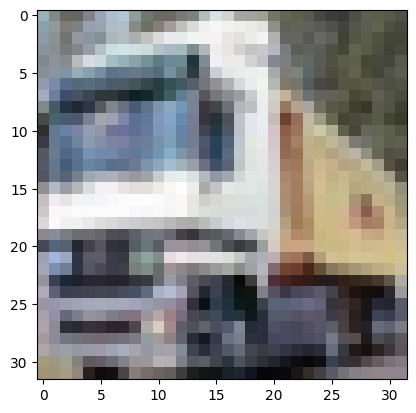

In [9]:
#plotting one image
import cv2
plt.imshow(X_train[1])

### Compute and display the number of classes.

In [10]:
print('The Total number of Classes are: ',len(np.unique(y_train)))

The Total number of Classes are:  10


### Compute and display the dimensions of each image.

In [12]:
print('The Dimension of each image is: ',X_train[0].shape)

The Dimension of each image is:  (32, 32, 3)


### Display one image from each class.

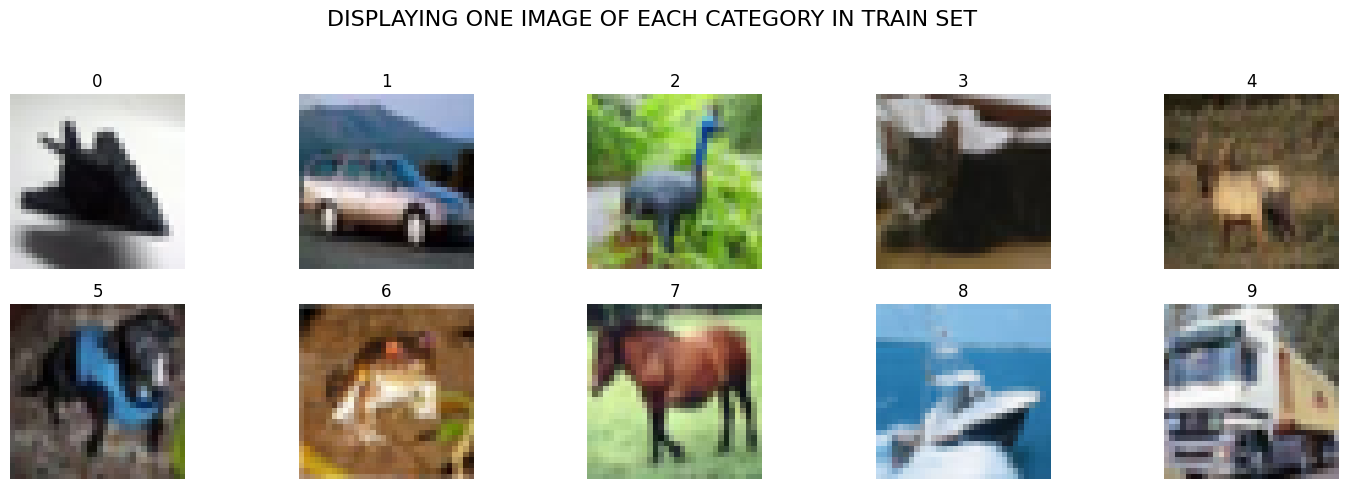

In [13]:
fig, ax= plt.subplots(nrows= 2, ncols= 5, figsize= (18,5))
plt.suptitle('displaying one image of each category in train set'.upper(),
             y= 1.05, fontsize= 16)
i= 0
for j in range(2):
  for k in range(5):
    ax[j,k].imshow(X_train[list(y_train).index(i)])
    ax[j,k].axis('off')
    ax[j,k].set_title(i)
    i+=1
plt.show()

### Perform normalization.

In [14]:
#converting image to gray scale
import cv2
x_train_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_train])
x_test_gray = np.array([cv2.cvtColor(img, cv2.COLOR_RGB2GRAY) for img in X_test])
#we can also do using tensorflow inbuilt function also for conversion

In [16]:
#new shapes and dimensions are
print(f"Training set shape: {x_train_gray.shape}")
print(f"Training set shape: {x_test_gray.shape}\n")
print('The Dimension of each image is: ',x_train_gray[0].shape)

Training set shape: (50000, 32, 32)
Training set shape: (10000, 32, 32)

The Dimension of each image is:  (32, 32)


# Performing experiments on Fully Connected Neural Networks (FCNN):

In [29]:
# Doing a FCNN Model
from tensorflow.keras.layers import Dropout,BatchNormalization,Dense,Flatten,ReLU
from tensorflow.keras.models import Sequential
#good to have the batchnormalization before after the dense and before the activation function and dropout is mainly done after the activation is done
model = Sequential([
    Flatten(input_shape=(32,32),name="flatten_layer"),
    Dense(512, name="HiddenLayer1"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(256, name="HiddenLayer2"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(128, name="HiddenLayer3"),
    BatchNormalization(),
    ReLU(),
    Dropout(0.3),
    Dense(10, activation="softmax", name="OutputLayer")
])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_layer (Flatten)              │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,898 (2.65 MB)

 Trainable params: 692,106 (2.64 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [30]:
#compiling the model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
import datetime
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time
start = datetime.datetime.now()

# Train the model
history = model.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

# Record end time
end = datetime.datetime.now()
print("\nTime taken to run:", end-start)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.2461 - loss: 2.1576 - val_accuracy: 0.2996 - val_loss: 1.9312
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3369 - loss: 1.8492 - val_accuracy: 0.3236 - val_loss: 1.8615
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3629 - loss: 1.7838 - val_accuracy: 0.3542 - val_loss: 1.7747
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3854 - loss: 1.7320 - val_accuracy: 0.3966 - val_loss: 1.7050
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4019 - loss: 1.6836 - val_accuracy: 0.3828 - val_loss: 1.7098
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4100 - loss: 1.6598 - val_accuracy: 0.3582 - val_loss: 1.7815
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4226 - loss: 1.6326 - val_accuracy: 0.4028 - val_loss: 1.6607
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4344 - loss: 1.6029 -

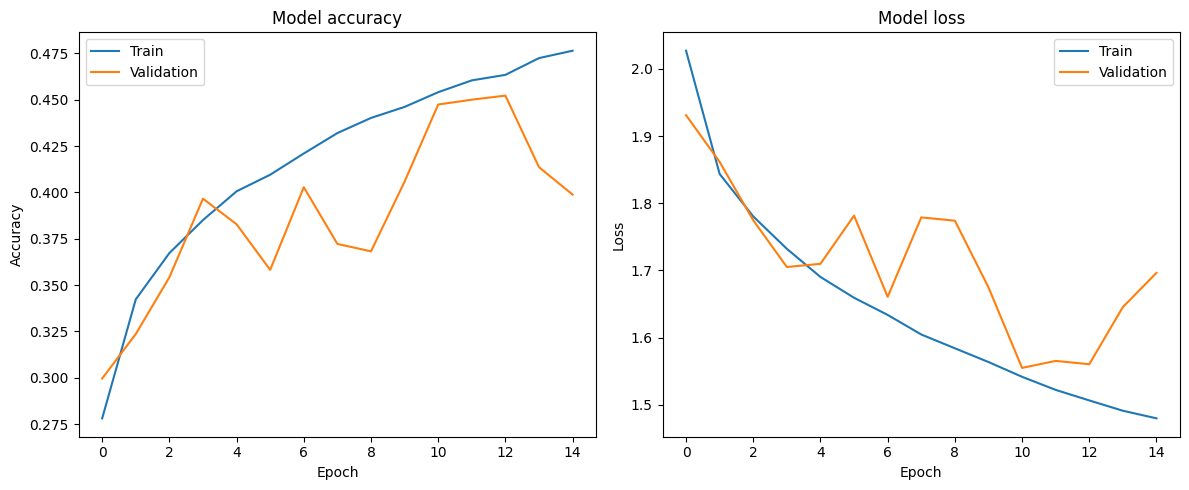

In [32]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

# Performing experiments on a Convolutional Neural Networks (CNNs):

In [43]:
#Defining the CNN1 Architecture
cnn1 = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 1), strides=(1, 1), padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100,activation='relu', name="HiddenLayer1"),
    Dense(10, activation='softmax', name="OutputLayer")
])
cnn1.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 100)                 │         627,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 629,142 (2.40 MB)

 Trainable params: 629,142 (2.40 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
cnn1.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [45]:
cnn2 = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 1), strides=(1, 1), padding='valid'),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=(1, 1), padding='valid'),
    MaxPool2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(100,activation='relu', name="HiddenLayer1"),
    Dense(10, activation='softmax', name="OutputLayer")
])
cnn2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 100)                 │       1,254,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ OutputLayer (Dense)                  │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,274,326 (4.86 MB)

 Trainable params: 1,274,326 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
cnn2.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=["accuracy"])

In [47]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn1 = datetime.datetime.now()

# Train CNN-1
history_cnn1 = cnn1.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn1 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn1-start_cnn1)

# Record start time for CNN-2
start_cnn2 = datetime.datetime.now()

# Train CNN-2
history_cnn2 = cnn2.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-2
end_cnn2 = datetime.datetime.now()
print("\nTime taken to run CNN-2:", end_cnn2-start_cnn2)


Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2457 - loss: 4.4632 - val_accuracy: 0.4138 - val_loss: 1.6246
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.4535 - loss: 1.5549 - val_accuracy: 0.4402 - val_loss: 1.6446
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5366 - loss: 1.3329 - val_accuracy: 0.5014 - val_loss: 1.4832
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5910 - loss: 1.1748 - val_accuracy: 0.5010 - val_loss: 1.5031
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6325 - loss: 1.0489 - val_accuracy: 0.5118 - val_loss: 1.5350
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6818 - loss: 0.9119 - val_accuracy: 0.5160 - val_loss: 1.6213

Time taken to run CNN-1: 0:00:32.976404
Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2726 - loss: 4.2353 - val_accuracy: 0.4492 - val_loss: 1.5482
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/

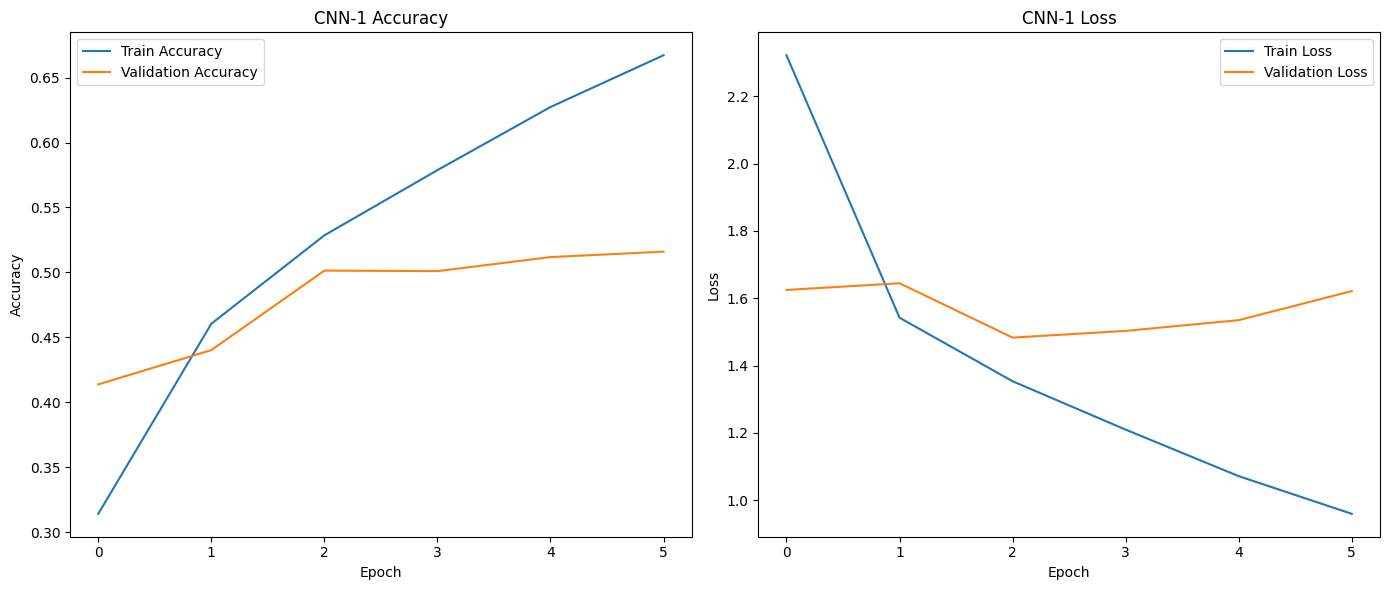

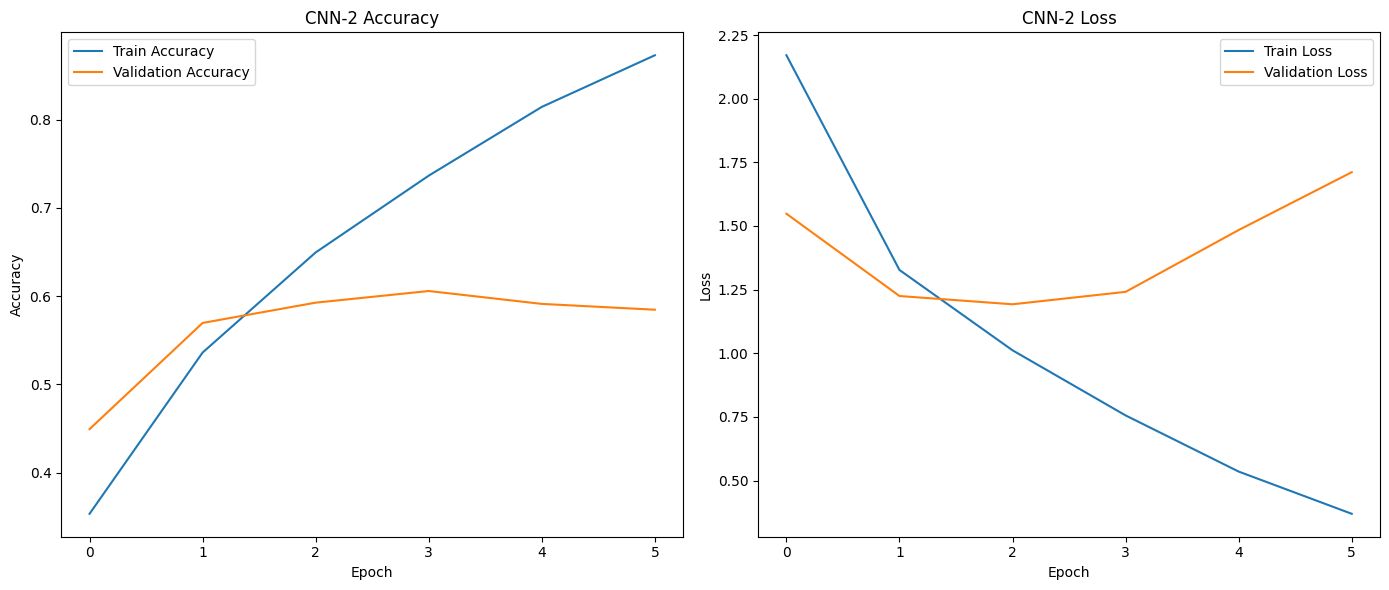

In [48]:
# Plot performance curves for CNN-1
plt.figure(figsize=(14, 6))

# Plot for CNN-1
plt.subplot(1, 2, 1)
plt.plot(history_cnn1.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn1.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-1 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn1.history['loss'], label='Train Loss')
plt.plot(history_cnn1.history['val_loss'], label='Validation Loss')
plt.title('CNN-1 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Plot performance curves for CNN-2
plt.figure(figsize=(14, 6))

# Plot for CNN-2
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn2.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN-2 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], label='Train Loss')
plt.plot(history_cnn2.history['val_loss'], label='Validation Loss')
plt.title('CNN-2 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# Evaluate CNN-1 on the test set
test_loss_cnn1, test_accuracy_cnn1 = cnn1.evaluate(x_test_gray, y_test)
print(f"CNN-1 Test Accuracy: {test_accuracy_cnn1}, Test Loss: {test_loss_cnn1}")

# Evaluate CNN-2 on the test set
test_loss_cnn2, test_accuracy_cnn2 = cnn2.evaluate(x_test_gray, y_test)
print(f"CNN-2 Test Accuracy: {test_accuracy_cnn2}, Test Loss: {test_loss_cnn2}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4903 - loss: 1.5046
CNN-1 Test Accuracy: 0.48669999837875366, Test Loss: 1.520219326019287
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5815 - loss: 1.2329
CNN-2 Test Accuracy: 0.578499972820282, Test Loss: 1.2345614433288574


##### We can see that the CNN2 performs slightly better compared to the CNN1

In [50]:
#Implementing a CNN Model with a more complex fcnn
cnn3_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(32,32,1), name="conv1"),
    tf.keras.layers.Conv2D(32, kernel_size=3, strides=1, padding='valid', activation='relu', name="conv2"),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, name="maxpool1"),
    tf.keras.layers.Flatten(name="flatten"),
    tf.keras.layers.Dense(512, activation="relu", name="HiddenLayer1"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(256, activation="relu", name="HiddenLayer2"),
    tf.keras.layers.Dropout(0.3),  # Dropout to reduce overfitting
    tf.keras.layers.Dense(128, activation="relu", name="HiddenLayer3"),
])
cnn3_model.add(tf.keras.layers.Dense(10, activation='softmax', name="outputLayer"))

cnn3_model.summary()

# Compile the model
cnn3_model.compile(loss="sparse_categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                       │ (None, 30, 30, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2 (Conv2D)                       │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool1 (MaxPooling2D)              │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer1 (Dense)                 │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer2 (Dense)                 │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ HiddenLayer3 (Dense)                 │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputLayer (Dense)                  │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,386,858 (12.92 MB)

 Trainable params: 3,386,858 (12.92 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
# Early stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Set batch size and epochs
batch_size = 32
epochs = 15

# Record start time for CNN-1
start_cnn3 = datetime.datetime.now()

# Train CNN-1
history_cnn3 = cnn3_model.fit(x_train_gray, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[early_stopping])

# Record end time for CNN-1
end_cnn3 = datetime.datetime.now()
print("\nTime taken to run CNN-1:", end_cnn3-start_cnn3)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.2696 - loss: 2.8792 - val_accuracy: 0.5100 - val_loss: 1.3860
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5356 - loss: 1.3348 - val_accuracy: 0.5996 - val_loss: 1.1478
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6380 - loss: 1.0500 - val_accuracy: 0.6150 - val_loss: 1.1150
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7042 - loss: 0.8608 - val_accuracy: 0.6310 - val_loss: 1.0962
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7717 - loss: 0.6792 - val_accuracy: 0.6300 - val_loss: 1.0834
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8226 - loss: 0.5358 - val_accuracy: 0.6326 - val_loss: 1.1903
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8666 - loss: 0.4119 - val_accuracy: 0.6124 - val_loss: 1.3017
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8845 - loss: 0.3555 

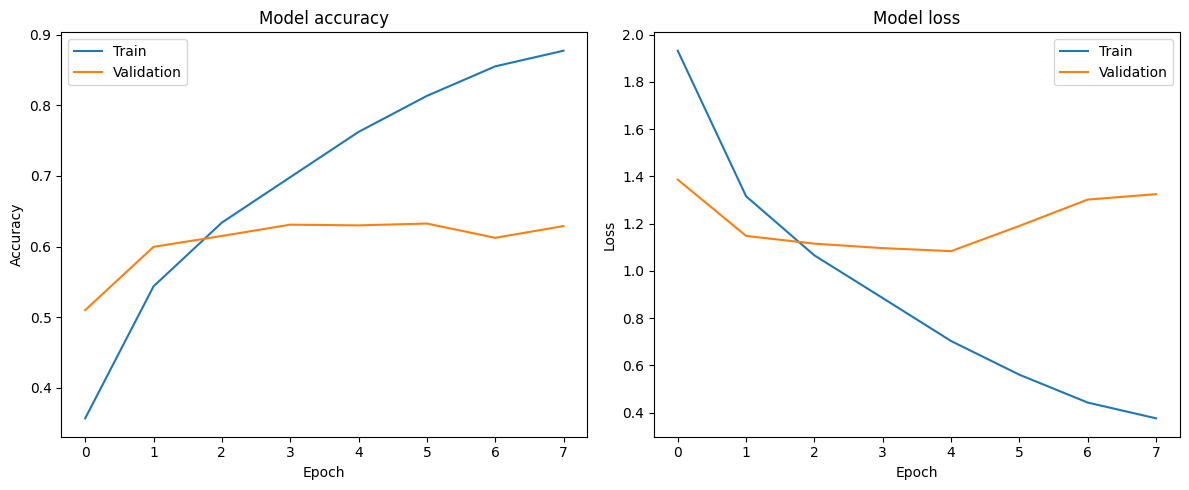

In [52]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_cnn3.history['accuracy'])
plt.plot(history_cnn3.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history_cnn3.history['loss'])
plt.plot(history_cnn3.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.tight_layout()
plt.show()

#### We can see that the CNN performs better than the FCNN and the fully connected neural networks that are in the CNN contribute more towars the number of parameters in the CNN,but compared to fcnn cnn has less number of parameters due to its properties like sparse connectivity,shared weights